In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [9]:
# Loading the MNIST data from keras.datasets

(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

In [10]:
# shape of the numpy arrays
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training Images = 60,000 

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [11]:
print(X_train[42])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1  26 111 195 230
   30   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  28 107 195 254 25

In [12]:
print(X_train[42].shape)


(28, 28)


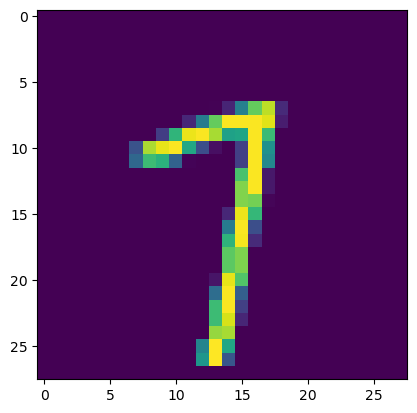

7


In [13]:
plt.imshow(X_train[42])
plt.show()

# print the corresponding label
print(Y_train[42])

In [14]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [15]:
# scaling the values

X_train = X_train/255
X_test = X_test/255
     

In [16]:
print(X_train[42])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [17]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

2024-04-25 03:51:21.128954: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-04-25 03:51:21.128985: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-04-25 03:51:21.128990: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-04-25 03:51:21.129420: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-25 03:51:21.129790: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [18]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10


2024-04-25 03:51:22.130049: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 11s 6ms/step - loss: 0.3849 - accuracy: 0.8922
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2975 - accuracy: 0.9174
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2923 - accuracy: 0.9188
Epoch 4/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2914 - accuracy: 0.9194
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2940 - accuracy: 0.9190
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2959 - accuracy: 0.9183
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3000 - accuracy: 0.9181
Epoch 8/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3026 - accuracy: 0.9176
Epoch 9/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3071 - accuracy: 0.9182
Epoch 10/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.31

In [20]:
# Accuracy on Test data

loss, accuracy = model.evaluate(X_test, Y_test)

 12/313 [>.............................] - ETA: 1s - loss: 0.2739 - accuracy: 0.9349  

2024-04-25 03:53:48.114332: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step - loss: 0.3276 - accuracy: 0.9162


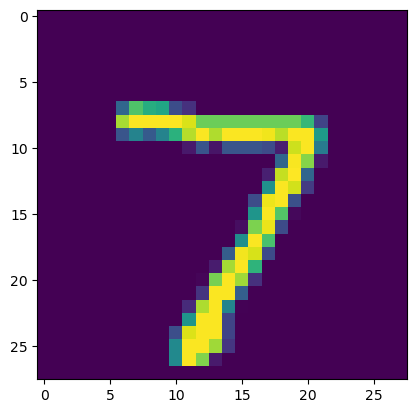

In [21]:
# first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [22]:
print(Y_test[0])

7


In [23]:
Y_pred = model.predict(X_test)

 90/313 [=======>......................] - ETA: 0s

2024-04-25 03:53:50.045870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


In [24]:
print(Y_pred.shape)

(10000, 10)


▲ Above we get 10 becoz, model.predict() gives the prediction probability of each class for that data point

Below is the example ▼

In [25]:
print(Y_pred[0])

[9.36107397e-01 1.12350775e-10 9.98889029e-01 9.99999762e-01
 9.78923976e-01 9.99843240e-01 1.23581279e-08 1.00000000e+00
 9.98593628e-01 9.99986172e-01]


In [26]:
# converting the prediction probabilities to class label

lable_for_first_test_image=np.argmax(Y_pred[0])
print(lable_for_first_test_image)

7


In [27]:
# converting the prediction probabilities to class label for all test data points

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 6, 4, 0, 6, 9, 0, 1, 5, 9, 3, 2, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 0, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 2, 0, 4, 1, 9, 5, 3, 2, 9, 3, 3, 4, 2, 4, 3, 0, 7, 0, 0, 9, 1, 7, 3, 2, 9, 3, 7, 6, 2, 7, 8, 4, 7, 3, 2, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 3, 3, 1, 9, 1, 8, 2, 0, 9, 9, 2, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 2, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 5, 1, 6, 4, 2, 3, 0, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 7, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 3, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 9, 4, 3, 3, 0, 0, 5, 1, 9, 6, 5, 3, 5, 7, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

**Building confusion Matrix**

In [28]:
conf_mat=confusion_matrix(Y_test,Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 961    0    0    2    1    8    3    2    3    0]
 [   0 1108    3    1    0    5    1    2   15    0]
 [  72   22  839   24    9    4    6    7   46    3]
 [  10    1   32  899    1   30    0    8   20    9]
 [   6    2   13    5  896    1    2    2    6   49]
 [   9    1   13   37   12  781    7    4   22    6]
 [  52    3   92    2   10   33  762    1    3    0]
 [  17    8   42  106   14    9    0  794    5   33]
 [  13    8   13   26   10   62    6    9  816   11]
 [   7    7   10    9   25    7    0   29   12  903]], shape=(10, 10), dtype=int32)


**Building Heat map of above confusion matrix**

Text(0.5, 47.7222222222222, 'Predicted Labels')

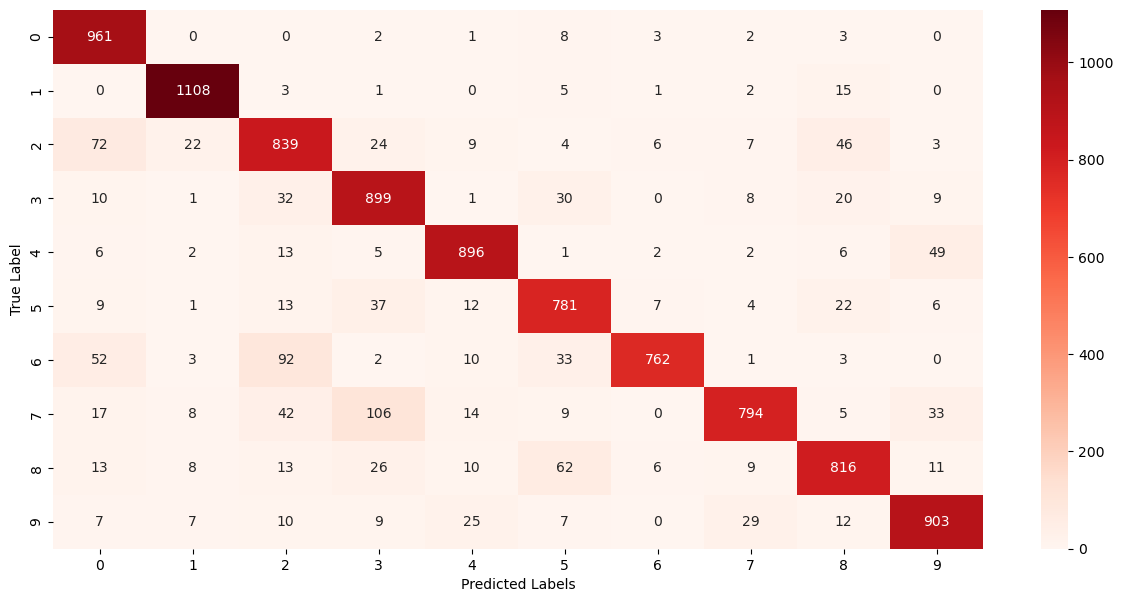

In [29]:
plt.figure(figsize=(15, 7))  # Create a figure with specified size
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Reds")  # Plot heatmap of confusion matrix with annotations, integer format, and colormap
plt.ylabel("True Label")  # Set y-axis label
plt.xlabel("Predicted Labels")  # Set x-axis label


**XXXXXXXXX Skip blow stuff XXXXXXXXX**

**Building a Predictive system**

In [31]:
input_image_path="download.png"
input_image=cv2.imread(input_image_path)

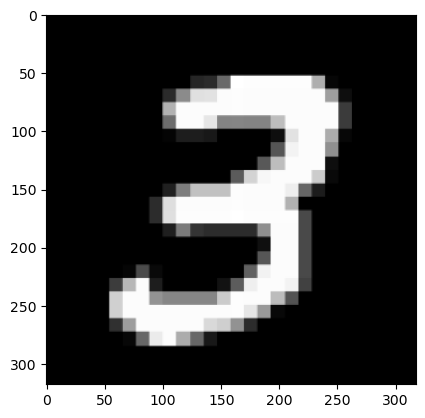

In [32]:
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))

In [37]:
input_image.shape

(318, 318, 3)

In [36]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [38]:
grayscale.shape

(318, 318)

In [39]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [40]:
input_image_resize.shape


(28, 28)

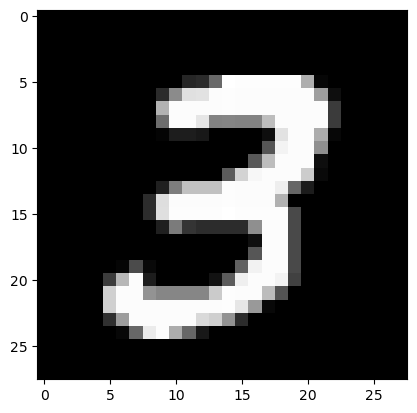

In [43]:
plt.imshow(cv2.cvtColor(input_image_resize, cv2.COLOR_BGR2RGB))

In [44]:
input_image_resize = input_image_resize/255